In [1]:
import os
import nltk
import numpy as np
import pandas as pd

In [2]:
os.chdir('D:\GCOEN\Data Science with Python\Excel Data Files')

In [3]:
df = pd.read_csv('Corona_NLP.csv', encoding = 'latin1', dtype = str)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.shape

(41157, 6)

In [5]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import regex

In [10]:
# Removing Stopwords

sw = stopwords.words('english')
print(sw)
lm = WordNetLemmatizer()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Preprocessing The OriginalTweet

from nltk import word_tokenize, sent_tokenize
tweets = []
t = []
for i in df['OriginalTweet']:
    t = regex.sub('[^A-Za-z0-9]',' ',i)         # Removing Punctuations
    t = t.lower()                               # Conversion To Lowercase
    t = word_tokenize(t)                        # Tokenizing Words
    t = [i for i in t if i not in sw]           # Stopwords Removal
    t = [lm.lemmatize(i) for i in t]            # Lemmatizing The Words
    t = " ".join(t)
    tweets.append(t)

In [12]:
print(tweets[1000])

okay people covid2019 thing need mention work grocery store part large national chain right pushed absolute limit double sometimes triple normally daily sale said 1


In [13]:
df['Preprocessed_Tweets'] = tweets
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Preprocessed_Tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv http co ifz9fan2p...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak paranoid...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilot offering stock supermarket shelf...
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid 19 re...
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,know getting tough kameronwilds rationing toil...
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn coron...


In [14]:
# Converting 'Extremely Positive' sentiments to 'Positive' and 'Extremely Negative' sentiments to 'Negative'

df = df.replace({'Sentiment': {'Extremely Positive' : 'Positive', 'Extremely Negative' : 'Negative'}})
pd.set_option("display.max_colwidth", -1)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_24076\4250833952.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Preprocessed_Tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral http co zrlg0z520j
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement http co usmualq72n
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral,airline pilot offering stock supermarket shelf nz lockdown covid 19 http co cz89ua0hnp
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Negative,response complaint provided citing covid 19 related delay yet prompt rejecting policy consumer tat way go
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive,know getting tough kameronwilds rationing toilet paper coronavirus toiletpaper kroger martinsville help u
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral,wrong smell hand sanitizer starting turn coronavirus covid19 coronavirus


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
sm = cv.fit_transform(df['Preprocessed_Tweets'].iloc[:15000]).toarray()
sm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
print(cv.get_feature_names()[:500])

['00', '000', '03', '10', '100', '1000', '10downingstreet', '11', '12', '13', '14', '15', '16', '17', '18', '19', '19th', '19uk', '1st', '20', '200', '2008', '2019', '2020', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2nd', '30', '300', '30am', '31', '35', '3rd', '40', '400', '45', '48', '50', '500', '55', '60', '65', '6am', '6ft', '70', '75', '7am', '80', '800', '8am', '8pm', '90', '95', '99', '9am', 'abc', 'abcnews', 'ability', 'able', 'absolute', 'absolutely', 'abt', 'abuse', 'abused', 'accept', 'access', 'according', 'account', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actor', 'actual', 'actually', 'ad', 'adapt', 'add', 'added', 'adding', 'additional', 'address', 'adjusted', 'administration', 'adult', 'advantage', 'advertising', 'advice', 'advised', 'affair', 'affect', 'affected', 'affecting', 'afford', 'affordable', 'afloat', 'afraid', 'africa', 'african', 'afternoon', 'ag', 'age', 'agency', 'agent', 'ago', 'agree', 'agreed', 'agricultural', 'agricultu

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral     7713 
Name: Sentiment, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])
df['Sentiment'].value_counts()

2    18046
0    15398
1    7713 
Name: Sentiment, dtype: int64

In [19]:
x = sm
y = df['Sentiment'].iloc[:15000]
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [20]:
# Splitting the given data into Training and Testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11250, 3000)
(3750, 3000)
(11250,)
(3750,)


In [21]:
#Applying Naive Bayes Classification

from sklearn.naive_bayes import MultinomialNB
m1 = MultinomialNB()
m1.fit(x_train, y_train)
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.7472
0.6605333333333333


In [22]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1[:500])

[2 2 1 2 0 0 1 2 0 2 2 2 1 1 0 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 2 0 2 2 0 1 0
 0 0 2 0 0 2 1 0 0 0 2 0 0 2 2 0 2 0 2 2 0 2 2 0 0 0 0 2 0 0 0 0 0 1 2 2 2
 2 0 0 0 2 0 1 0 2 1 0 2 2 2 0 1 2 2 2 2 0 0 1 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 0 2 2 0 0 2 2 1 1 2 0 2 0 2 2 0 0 2 2 0 1 2 2 0 1 2 0 0 2 1 1 2 0 2 0 2
 0 1 1 1 0 1 2 2 0 2 0 1 2 0 0 1 2 0 2 0 0 2 0 0 0 2 0 0 1 2 2 0 2 0 2 2 0
 2 0 2 0 0 1 1 2 0 1 0 2 1 1 0 1 2 0 1 0 0 2 1 0 0 2 2 2 1 0 0 0 0 0 2 2 0
 0 0 1 2 0 2 1 1 0 1 2 0 0 1 2 2 2 0 0 0 2 0 2 1 2 2 1 0 2 1 0 1 2 2 2 0 2
 2 2 1 2 0 2 2 2 2 0 2 2 2 2 0 2 0 1 0 2 0 1 0 2 0 0 2 0 2 2 2 1 1 1 2 2 0
 1 0 0 2 2 0 0 0 2 0 2 1 1 0 0 1 0 0 2 0 2 0 1 0 0 0 0 2 2 1 2 0 0 2 0 0 0
 1 1 2 2 0 2 0 0 0 0 2 0 1 0 2 0 2 1 1 2 1 0 1 0 1 1 2 2 0 2 0 0 1 1 0 2 0
 1 0 0 2 1 1 2 0 2 2 1 2 0 0 2 2 0 0 2 0 1 2 0 0 2 0 0 1 0 0 2 0 2 1 0 2 2
 1 0 2 2 2 2 0 0 2 2 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 2 1 0 2 2 2 0 0 0 1 2 0
 2 0 2 1 0 2 2 2 0 1 0 0 2 2 0 0 1 2 2 2 2 2 0 2 2 2 1 0 1 2 2 0 2 0 2 1 2
 2 0 0 2 0 2 2 0 0 1 2 0 

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[1073  160  299]
 [ 138  350  160]
 [ 319  197 1054]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1532
           1       0.50      0.54      0.52       648
           2       0.70      0.67      0.68      1570

    accuracy                           0.66      3750
   macro avg       0.63      0.64      0.63      3750
weighted avg       0.66      0.66      0.66      3750



In [24]:
#Applying KNN 

from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors = 1)
m2.fit(x_train,y_train)
print(m2.score(x_train,y_train))
print(m2.score(x_test,y_test))

0.9999111111111111
0.376


In [25]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2[:500])

[1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 2 1 2 2 0 1 1 1 1 1
 0 0 2 1 0 0 1 0 0 0 1 0 0 0 2 2 2 1 1 1 0 2 1 1 0 1 1 2 1 0 1 1 1 0 1 2 0
 2 0 1 0 0 1 1 1 1 2 1 2 1 1 1 1 2 2 0 1 0 1 2 0 2 2 1 2 2 1 1 1 1 2 1 0 1
 0 1 2 0 0 0 2 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 2 1 1
 1 1 1 1 1 2 1 1 0 1 0 0 1 0 1 1 1 0 0 2 1 2 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 0 0 1 1 1 0 2 1 1 1 2 1 2 0 0 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 2 0 2 0 1 1 0 2 0 0 1 1 1 0 1
 1 1 1 0 2 1 1 1 0 0 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 1 1 2 1 1 1 0 0 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 2 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 2 1 2 0 1 1 1 1 1 0 0 1 0 0 1 1 0 2 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 2 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 2 0 1 2 1 2 2 0 1 1 1 1 1 0 1 2 2
 1 2 0 2 0 1 0 1 1 1 1 0 0 1 1 2 1 1 0 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 1 1 1 0 

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, ypred_m2)
print(cm)
print(classification_report(y_test,ypred_m2))

[[588 820 124]
 [109 491  48]
 [316 923 331]]
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      1532
           1       0.22      0.76      0.34       648
           2       0.66      0.21      0.32      1570

    accuracy                           0.38      3750
   macro avg       0.49      0.45      0.37      3750
weighted avg       0.55      0.38      0.38      3750



In [27]:
# Calculating error for k values between 1 and 60

error = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

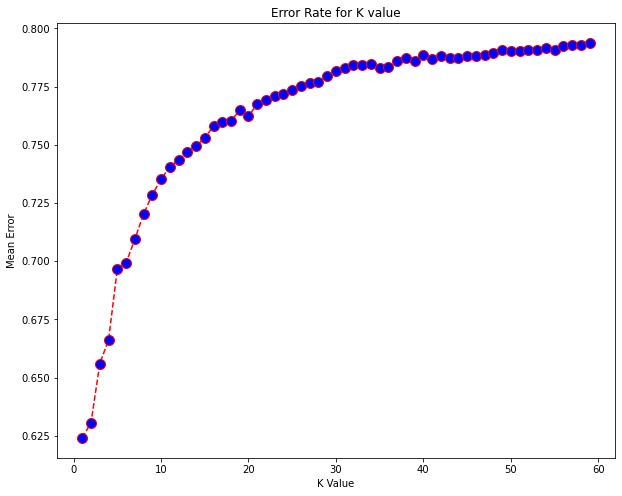

In [28]:
# Plotting Graph of K Value vs Mean Error

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate for K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The result obtained above shows that the knn model has least error for K values between 1 to 5. 
So to obtain the best results we should select K values between this range.
We have obtained the result for K=1 previously, providing an accuracy of about 36%

In [31]:
# HyperParameter Tuning for SVM Classifier to find the best parameters

from sklearn.svm import SVC
parameter_grid = {'C' : [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel' : ['rbf']}


In [32]:
SVM_model = SVC(gamma='auto')

In [33]:
# Performing Random Grid Search

from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomizedSearchCV (estimator = SVM_model, param_distributions = parameter_grid, cv = 3, verbose = 2, n_jobs = 4)
rf_grid.fit(x,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [34]:
rf_grid.best_estimator_

SVC(C=100, gamma=0.01)

In [35]:
# Applying SVM Classifier with rbf kernel

m4 = SVC(kernel = 'rbf', C=100, gamma = 0.01)

In [36]:
m4.fit(x_train, y_train)
print(m4.score(x_train, y_train))
print(m4.score(x_test, y_test))

0.9974222222222222
0.7226666666666667


In [37]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4[:500])

[2 1 2 2 0 0 1 0 2 0 0 2 0 1 2 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 2 0 2 0 2 1 0
 0 0 2 0 2 2 1 0 0 0 2 0 0 2 2 2 2 0 0 2 0 2 2 2 0 0 0 2 2 1 2 1 1 0 1 2 2
 2 0 0 0 2 0 1 0 2 1 0 0 2 2 2 1 2 2 2 0 0 0 1 0 2 2 0 2 2 2 2 2 2 2 2 0 2
 0 2 2 2 0 0 2 0 1 1 2 0 2 2 2 1 0 0 2 0 0 2 0 1 0 1 2 0 0 2 1 0 2 1 2 0 1
 2 1 1 1 1 2 2 1 0 2 2 0 2 0 0 0 2 0 2 0 1 2 0 0 0 2 2 0 0 2 2 0 0 0 2 2 0
 2 0 2 0 2 1 2 2 0 1 0 2 1 2 0 2 1 1 1 0 0 1 1 0 0 1 2 2 0 0 2 1 0 0 1 2 0
 2 1 1 2 1 2 1 1 0 1 1 0 2 2 2 2 0 0 0 0 2 1 2 0 2 2 1 0 1 1 0 1 2 0 2 0 2
 2 0 0 2 2 0 1 2 0 0 2 0 1 0 0 2 0 1 0 2 0 2 0 0 0 0 0 0 0 2 0 1 2 0 0 2 0
 1 0 0 2 0 1 0 0 2 0 2 0 1 2 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 2 0 0 2 0 0 0
 1 0 0 2 0 2 0 0 0 0 0 0 2 1 2 0 2 0 0 1 2 2 1 0 1 0 2 2 0 0 0 0 1 1 0 2 0
 1 1 0 1 1 1 2 0 2 2 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2
 0 0 2 0 2 1 0 0 1 2 0 2 1 0 0 2 0 1 0 0 2 0 0 0 0 2 2 0 2 2 2 0 2 2 2 0 0
 2 0 2 2 0 2 2 2 0 1 0 0 1 2 1 0 1 2 2 2 2 2 0 1 2 2 1 2 1 2 2 0 0 0 2 1 0
 2 0 0 2 0 2 2 0 1 1 2 0 

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, ypred_m4)
print(cm)
print(classification_report(y_test,ypred_m4))

[[1158  137  237]
 [ 124  421  103]
 [ 299  140 1131]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1532
           1       0.60      0.65      0.63       648
           2       0.77      0.72      0.74      1570

    accuracy                           0.72      3750
   macro avg       0.70      0.71      0.70      3750
weighted avg       0.73      0.72      0.72      3750



In [40]:
# Applying SVM Classifier with linear kernel

m3 = SVC(kernel = 'linear', C=0.1, gamma=0.001)

Here, after performing Grid Search for SVM with linear kernel, the values for C and gamma obtained are respectively 0.1 and 0.001.

In [41]:
m3.fit(x_train,y_train)
print(m3.score(x_train,y_train)) 
print(m3.score(x_test,y_test))

0.8546666666666667
0.7426666666666667


In [42]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3[:500])

[0 1 2 0 2 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 2 0 0 0 2 0 2 0 2 0 2 2
 0 0 1 0 0 2 0 2 0 2 1 2 0 0 1 0 0 1 0 2 0 0 0 1 2 1 2 0 2 2 1 2 2 1 2 0 2
 0 0 2 2 2 0 0 0 1 1 2 0 0 0 2 2 0 1 2 0 2 2 1 0 2 0 2 1 0 0 0 0 2 0 1 0 2
 2 1 0 2 1 0 0 0 2 2 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 2 1 0 0 2 1 1 2 0
 1 2 2 0 2 2 0 0 0 2 0 1 2 0 2 2 2 0 0 2 0 2 2 0 1 0 2 1 2 1 2 2 2 0 0 0 2
 0 0 2 0 1 2 0 2 0 2 0 2 0 2 2 0 0 0 1 0 0 2 2 2 1 0 0 2 2 2 2 2 0 1 0 0 0
 2 2 2 2 1 2 1 0 2 2 0 1 0 0 0 2 0 0 0 1 1 2 2 0 2 0 2 0 0 0 0 1 1 1 0 2 2
 0 0 2 1 0 2 0 1 0 2 0 2 0 1 1 0 2 0 0 1 2 1 2 2 0 0 2 2 2 2 1 0 2 0 1 2 2
 0 0 0 2 2 1 2 2 0 0 2 2 2 0 2 2 1 2 0 1 0 0 2 2 1 2 0 0 0 0 0 2 2 2 1 1 2
 2 0 2 0 0 1 2 2 0 2 2 0 2 2 1 1 2 0 2 1 2 2 2 1 0 0 0 2 0 1 0 0 0 1 0 1 1
 1 1 0 0 0 2 0 2 2 2 2 0 0 0 0 0 2 0 0 0 2 0 1 0 2 2 1 0 2 2 0 0 1 1 2 0 2
 2 0 2 2 0 1 0 0 1 0 2 0 0 0 2 2 1 1 2 0 0 0 0 0 1 2 0 2 0 2 0 0 2 1 0 2 0
 2 1 0 1 0 2 2 0 0 2 0 2 2 2 1 0 1 0 1 2 2 2 2 0 2 0 0 1 2 1 2 0 2 0 0 0 2
 2 0 0 2 1 0 0 0 1 1 0 2 

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, ypred_m3)
print(cm)
print(classification_report(y_test,ypred_m3))

[[1175  159  212]
 [ 125  417  104]
 [ 239  126 1193]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1546
           1       0.59      0.65      0.62       646
           2       0.79      0.77      0.78      1558

    accuracy                           0.74      3750
   macro avg       0.72      0.72      0.72      3750
weighted avg       0.75      0.74      0.74      3750



Conclusion : The SVM model with linear kernel has the best accuracy for the given dataset.